In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Step 1: Preprocessing and Data Exploration")


Step 1: Preprocessing and Data Exploration


In [2]:
df = pd.read_csv('Dataset.csv')

# Drop rows where 'Cuisines' is missing
df.dropna(subset=['Cuisines'], inplace=True)

# Extract the first cuisine as "Main_Cuisine"
df['Main_Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

print("Data loaded and cleaned successfully.")


Data loaded and cleaned successfully.



Step 2: Geographical Visualization


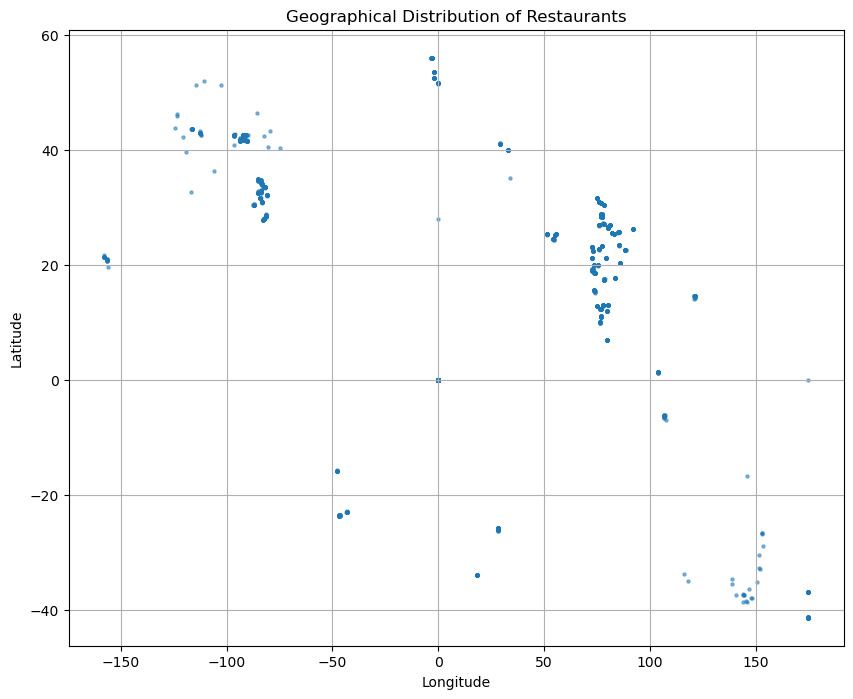

In [3]:
print("\nStep 2: Geographical Visualization")

plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=5)
plt.title('Geographical Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [4]:
print("\nStep 3: Analysis of Restaurant Concentration")

# Count restaurants per city
city_counts = df['City'].value_counts()
print("Top 10 Cities by Restaurant Count:")
print(city_counts.head(10))

# Count restaurants per locality
locality_counts = df['Locality'].value_counts()
print("\nTop 10 Localities by Restaurant Count:")
print(locality_counts.head(10))



Step 3: Analysis of Restaurant Concentration
Top 10 Cities by Restaurant Count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Name: count, dtype: int64

Top 10 Localities by Restaurant Count:
Locality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Pitampura               85
Malviya Nagar           85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: count, dtype: int64


In [5]:
print("\nStep 4: Calculate Statistics by Location")

city_stats = df.groupby('City').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Average_Price_Range=('Price range', 'mean'),
    Total_Restaurants=('Restaurant ID', 'count'),
    Most_Common_Cuisine=('Main_Cuisine', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
)

city_stats = city_stats.sort_values(by='Total_Restaurants', ascending=False)

print("\nCity-wise Restaurant Statistics:")
print(city_stats.head(10))



Step 4: Calculate Statistics by Location

City-wise Restaurant Statistics:
              Average_Rating  Average_Price_Range  Total_Restaurants  \
City                                                                   
New Delhi           2.438845             1.621597               5473   
Gurgaon             2.651431             1.855993               1118   
Noida               2.036204             1.601852               1080   
Faridabad           1.866932             1.454183                251   
Ghaziabad           2.852000             1.800000                 25   
Bhubaneshwar        3.980952             1.857143                 21   
Guwahati            4.190476             2.523810                 21   
Lucknow             4.195238             2.571429                 21   
Ahmedabad           4.161905             2.571429                 21   
Amritsar            3.685714             1.809524                 21   

             Most_Common_Cuisine  
City                    

In [6]:
locality_stats = df.groupby('Locality').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Average_Price_Range=('Price range', 'mean'),
    Total_Restaurants=('Restaurant ID', 'count'),
    Most_Common_Cuisine=('Main_Cuisine', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
)

locality_stats = locality_stats.sort_values(by='Total_Restaurants', ascending=False)

print("\nLocality-wise Restaurant Statistics:")
print(locality_stats.head(10))



Locality-wise Restaurant Statistics:
                     Average_Rating  Average_Price_Range  Total_Restaurants  \
Locality                                                                      
Connaught Place            3.686885             2.598361                122   
Rajouri Garden             3.591919             2.202020                 99   
Shahdara                   1.413793             1.137931                 87   
Defence Colony             3.210465             1.930233                 86   
Malviya Nagar              3.428235             1.776471                 85   
Pitampura                  2.870588             1.470588                 85   
Mayur Vihar Phase 1        2.026190             1.297619                 84   
Rajinder Nagar             2.943210             1.432099                 81   
Safdarjung                 2.801250             1.675000                 80   
Satyaniketan               3.482278             1.620253                 79   

             


Step 5: Visualization of Popular Cuisines


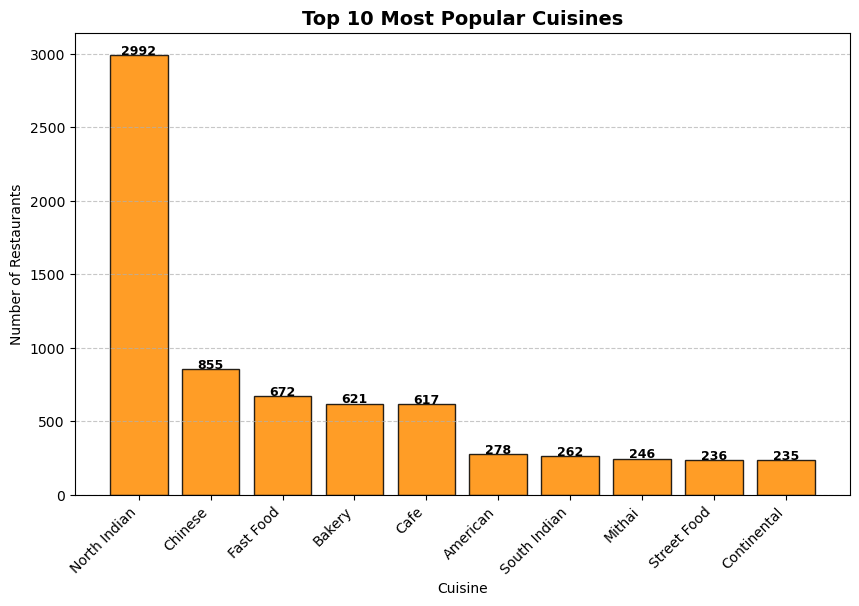

In [7]:
print("\nStep 5: Visualization of Popular Cuisines")

# Count the most common main cuisines
cuisine_counts = df['Main_Cuisine'].value_counts().head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(cuisine_counts.index, cuisine_counts.values, color='darkorange', alpha=0.85, edgecolor="black")

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(bar.get_height()), ha='center', fontsize=9, weight='bold')

plt.title("Top 10 Most Popular Cuisines", fontsize=14, weight='bold')
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
